In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv('/home/ubuntu/year3/data_visualisation/lab9/2019.csv')
df.head()
original=df.copy()
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df.style.apply(highlight_max, subset=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000


In [17]:
df.shape
df_new = df.drop(columns=['Country or region'])

<Axes: >

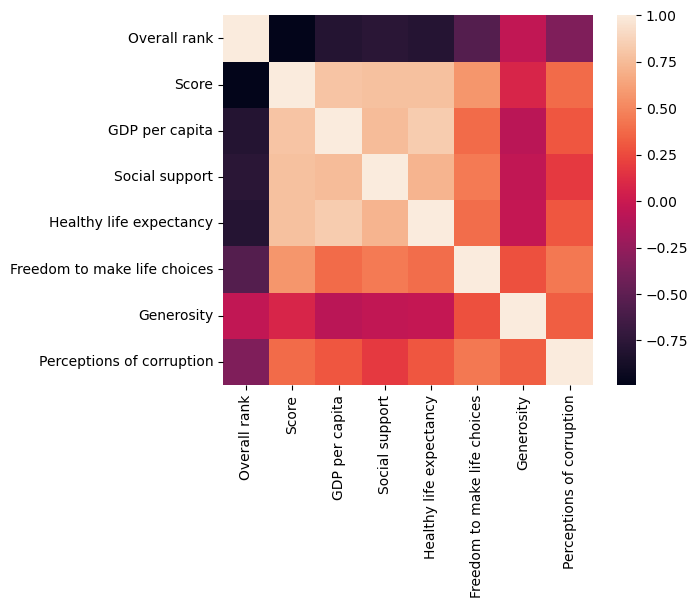

In [18]:
corrmat = df_new.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True)

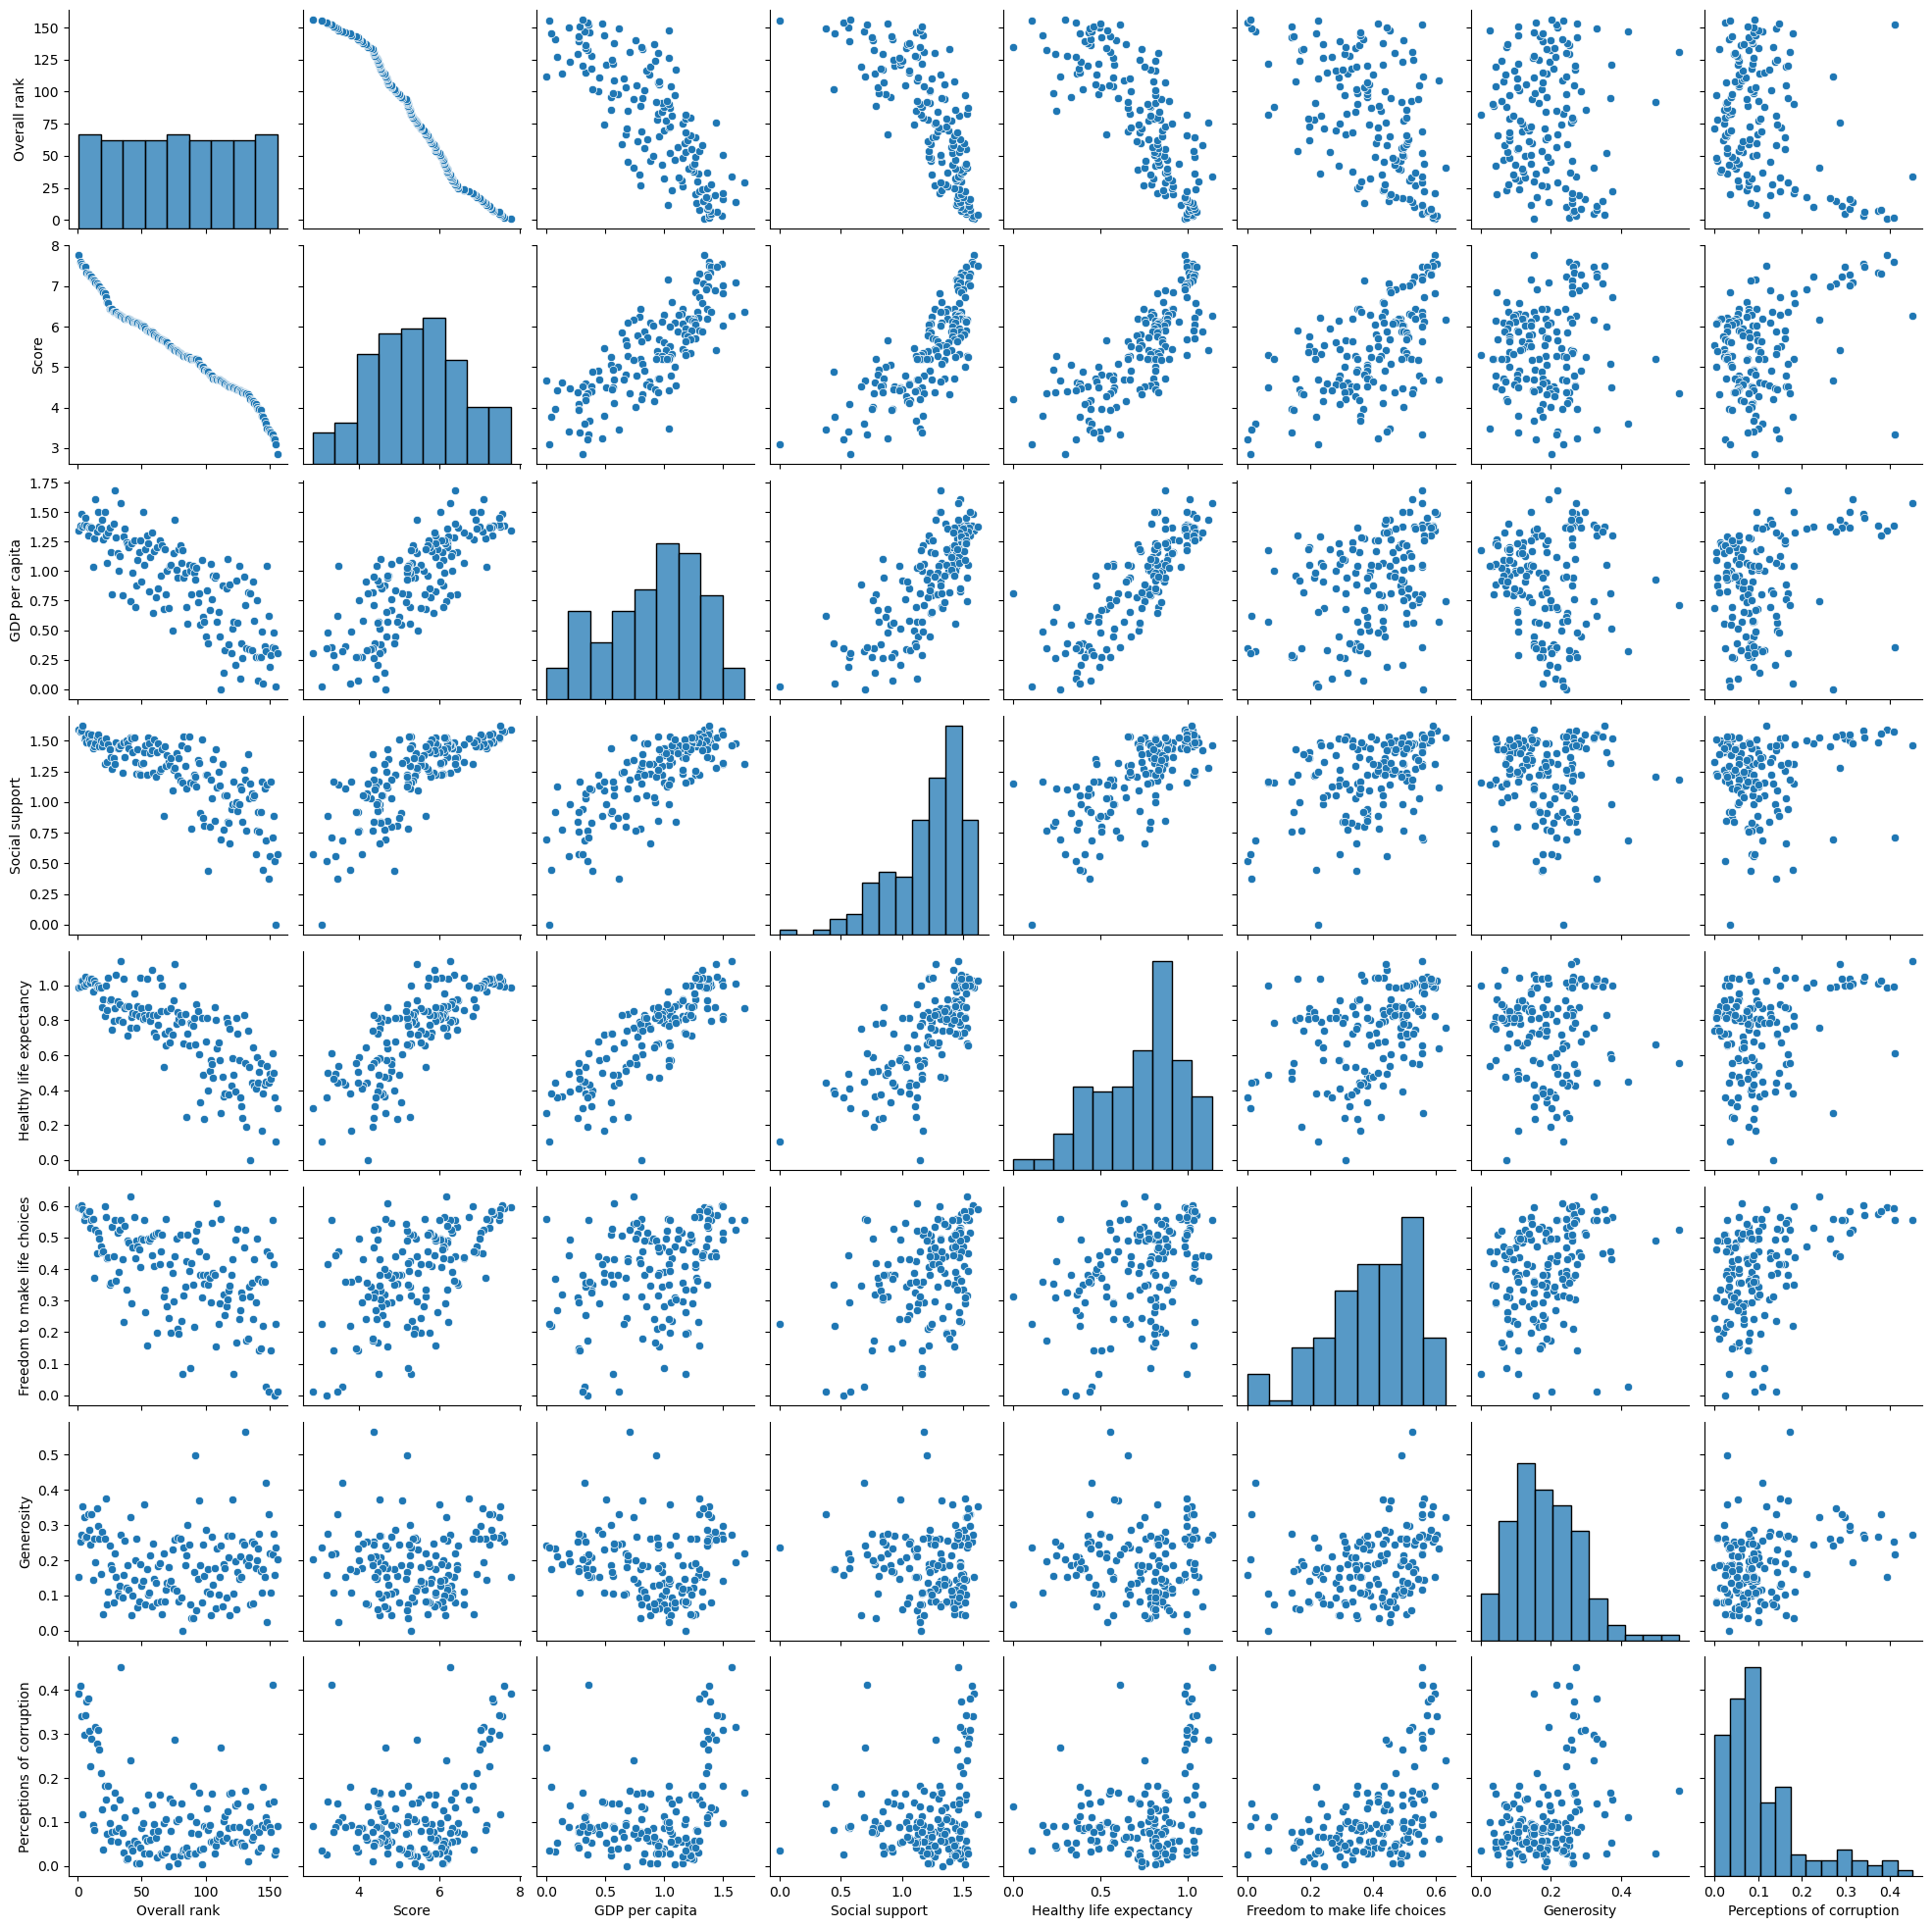

In [20]:
sns.pairplot(df_new)

<Axes: xlabel='Freedom to make life choices', ylabel='Country or region'>

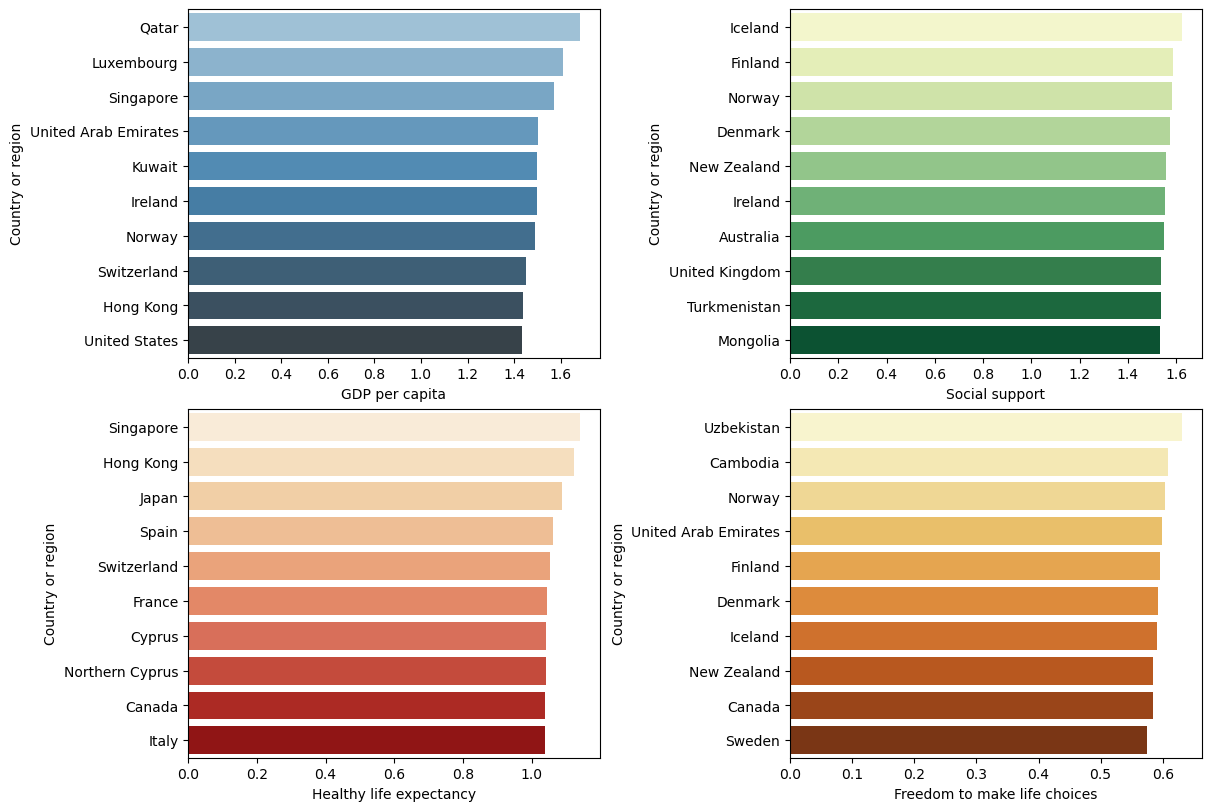

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',data=df.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',data=df.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=df.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=df.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

<Axes: xlabel='Perceptions of corruption', ylabel='Country or region'>

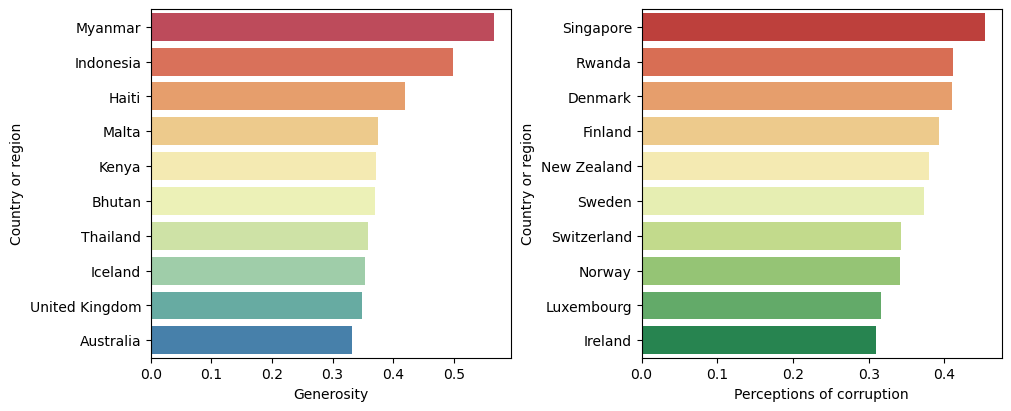

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country or region',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Perceptions of corruption' ,y='Country or region',data=df.nlargest(10,'Perceptions of corruption'),ax=axes[1],palette='RdYlGn')

In [23]:


print('max:',df['Score'].max())
print('min:',df['Score'].min())
add=df['Score'].max()-df['Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))



max: 7.769
min: 2.853
range difference: 1.639


In [25]:
low=df['Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['Score'].max())

upper bound of Low grp 4.492
upper bound of Mid grp 6.131
upper bound of High grp max: 7.769


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [27]:
cat=[]
for i in df.Score:
    if(i>0 and i<low):
        cat.append('Low')
        
        
    elif(i>low and i<mid):
         cat.append('Mid')
    else:
         cat.append('High')

df['Category']=cat  
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Low
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Low
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Low
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Low


give a category to each country as High,Mid and Low according to their happiness scores.

In [28]:


color = (df.Category == 'High' ).map({True: 'background-color: limegreen',False:'background-color: red'})
df.style.apply(lambda s: color)



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000,High
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000,High
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000,High
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000,High
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000,High
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000,High
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000,High
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000,High
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000,High
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000,High


In [29]:
df.loc[df['Country or region']=='United States']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.28,0.128,High


belong to the HIGH category

In [30]:
d= df[(df['Country or region'].isin(['India','Canada','United Kingdom', 'United States']))]
d


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,High
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278,High
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,High
139,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085,Low


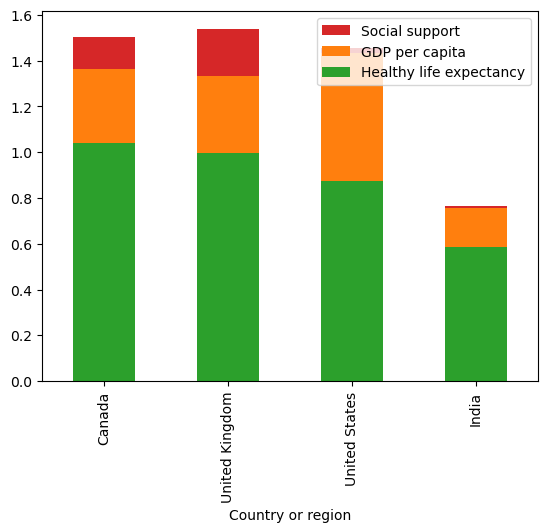

In [31]:
ax = d.plot(y="Social support", x="Country or region", kind="bar",color='C3')
d.plot(y="GDP per capita", x="Country or region", kind="bar", ax=ax, color="C1")
d.plot(y="Healthy life expectancy", x="Country or region", kind="bar", ax=ax, color="C2")

plt.show()

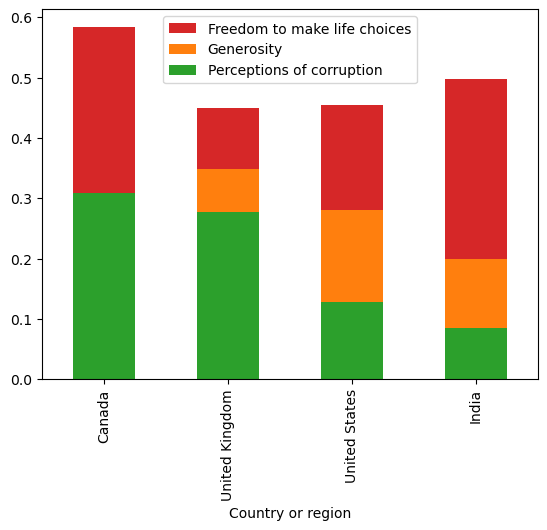

In [32]:


ax = d.plot(y="Freedom to make life choices", x="Country or region", kind="bar",color='C3')
d.plot(y="Generosity", x="Country or region", kind="bar", ax=ax, color="C1",)
d.plot(y="Perceptions of corruption", x="Country or region", kind="bar", ax=ax, color="C2",)

plt.show()



In [34]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Define the choropleth map
choropleth = go.Choropleth(
    locations=df['Country or region'],
    locationmode='country names',
    colorscale='RdYlGn',
    z=df['Score'],
    text=df['Country or region'],
    colorbar={'title': 'Happiness Score'}
)

# Define the layout
layout = go.Layout(
    title='Geographical Visualization of Happiness Score',
    geo=dict(
        showframe=True,
        projection=dict(type='azimuthal equal area')
    )
)

choromap3 = go.Figure(data=[choropleth], layout=layout)

iplot(choromap3)


In [35]:
df15=pd.read_csv('/home/ubuntu/year3/data_visualisation/lab9/2015.csv')
df16=pd.read_csv('/home/ubuntu/year3/data_visualisation/lab9/2016.csv')
df17=pd.read_csv('/home/ubuntu/year3/data_visualisation/lab9/2017.csv')
df18=pd.read_csv('/home/ubuntu/year3/data_visualisation/lab9/2018.csv')


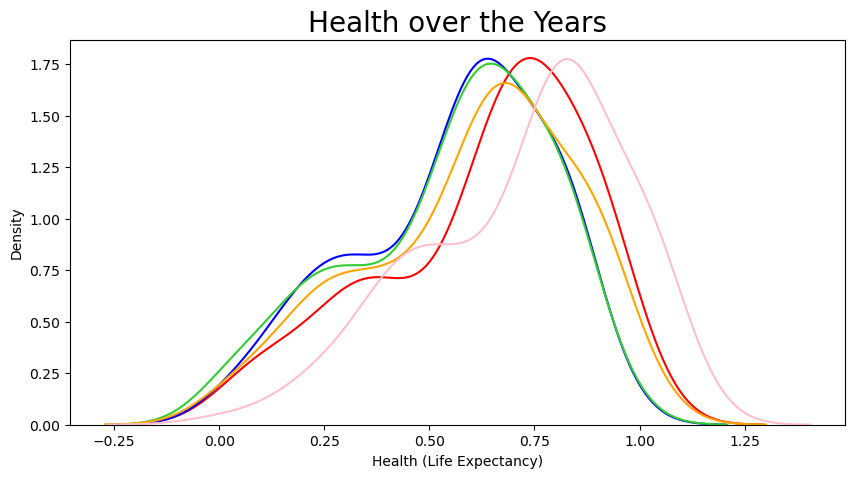

In [37]:
plt.figure(figsize=(10,5))
sns.kdeplot(df15['Health (Life Expectancy)'],color='red')
sns.kdeplot(df16['Health (Life Expectancy)'],color='blue')
sns.kdeplot(df17['Health..Life.Expectancy.'],color='limegreen')
sns.kdeplot(df18['Healthy life expectancy'],color='orange')
sns.kdeplot(df['Healthy life expectancy'],color='pink')
plt.title('Health over the Years',size=20)
plt.show()

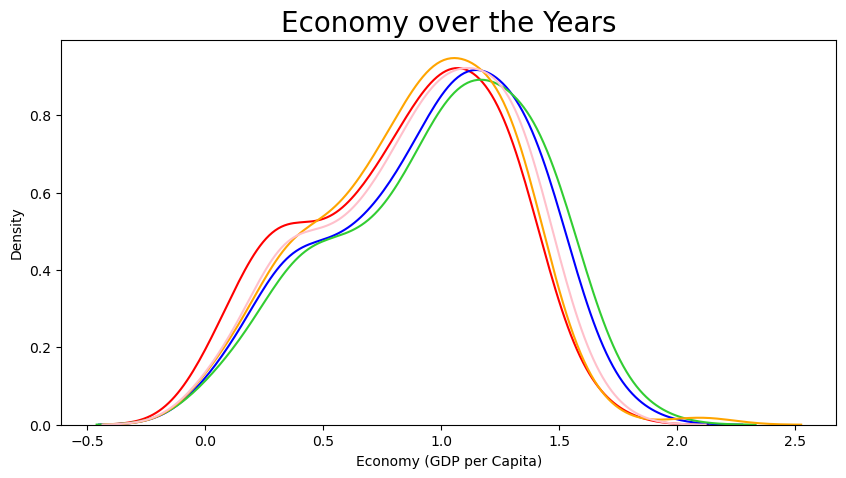

In [38]:
plt.figure(figsize=(10,5))
sns.kdeplot(df15['Economy (GDP per Capita)'],color='red')
sns.kdeplot(df16['Economy (GDP per Capita)'],color='blue')
sns.kdeplot(df17['Economy..GDP.per.Capita.'],color='limegreen')
sns.kdeplot(df18['GDP per capita'],color='orange')
sns.kdeplot(df['GDP per capita'],color='pink')
plt.title('Economy over the Years',size=20)
plt.show()

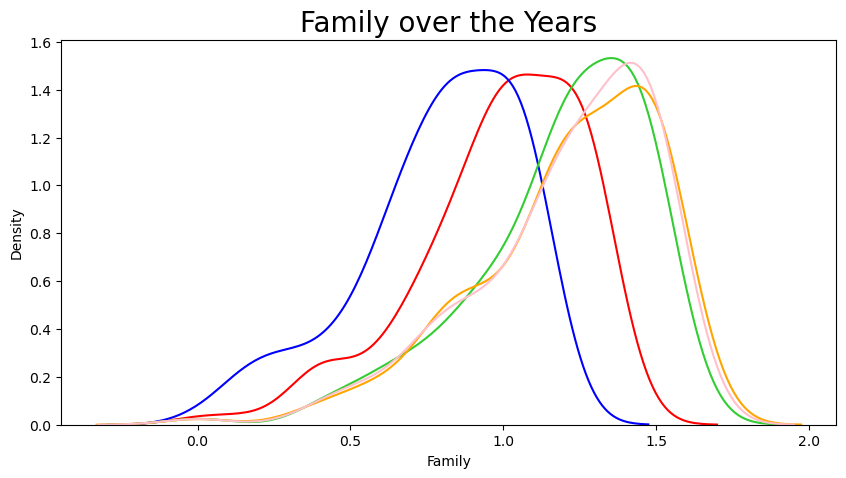

In [39]:
plt.figure(figsize=(10,5))
sns.kdeplot(df15['Family'],color='red')
sns.kdeplot(df16['Family'],color='blue')
sns.kdeplot(df17['Family'],color='limegreen')
sns.kdeplot(df18['Social support'],color='orange')
sns.kdeplot(df['Social support'],color='pink')
plt.title('Family over the Years',size=20)
plt.show()

In [43]:
df_new2 = df_new.drop(columns=['Overall rank'])
from sklearn.preprocessing import normalize
data_scaled = normalize(df_new)
data_scaled = pd.DataFrame(data_scaled, columns=df_new.columns)
datasc=data_scaled.copy()
data_scaled.head()



,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.122009,0.947885,0.163491,0.193628,0.120300,0.072717,0.018667,0.047949
1,0.243035,0.923531,0.168058,0.191147,0.121031,0.071938,0.030622,0.049822
2,0.352600,0.887847,0.174890,0.185938,0.120824,0.070873,0.031852,0.040079
3,0.452207,0.847210,0.156011,0.183596,0.115991,0.066814,0.040020,0.013340
4,0.536562,0.803555,0.149808,0.163329,0.107205,0.059773,0.034555,0.031979


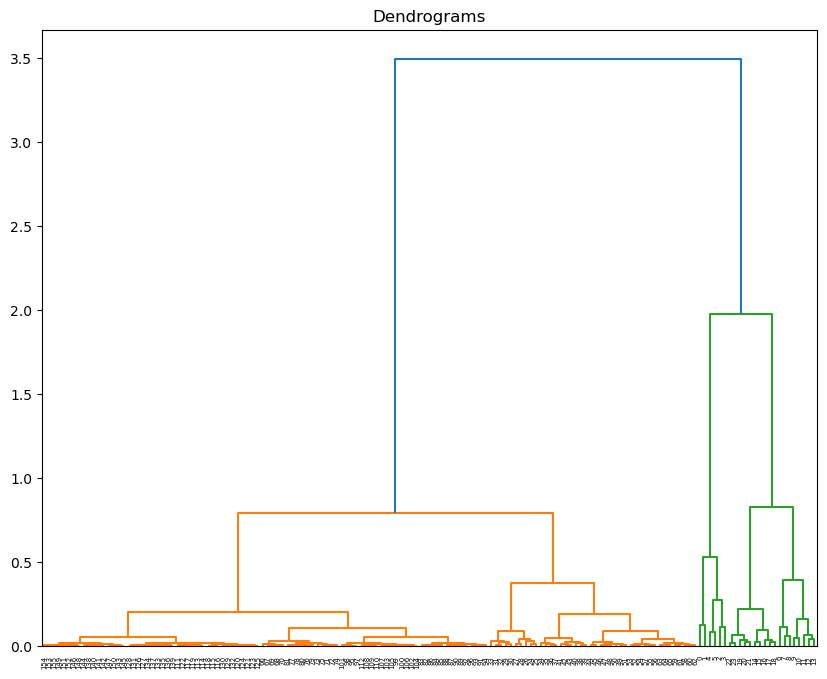

In [44]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

two clusters as this line cuts the dendrogram at two points. Apply hierarchical clustering for 2 clusters

In [47]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the Agglomerative Clustering model
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit and predict clusters on the scaled data
labels = cluster.fit_predict(data_scaled)

# Optionally, you can print or analyze the predicted labels
print(labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead





    0-belongs to cluster number 1
    1-belongs to cluster number 2



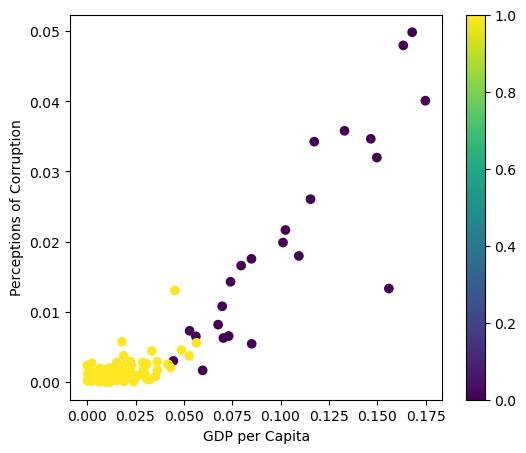

In [48]:
plt.figure(figsize=(6, 5))  
plt.scatter(data_scaled['GDP per capita'], data_scaled['Perceptions of corruption'], c=cluster.labels_) 
plt.xlabel('GDP per Capita')
plt.ylabel('Perceptions of Corruption')
plt.colorbar()

k-means clustering

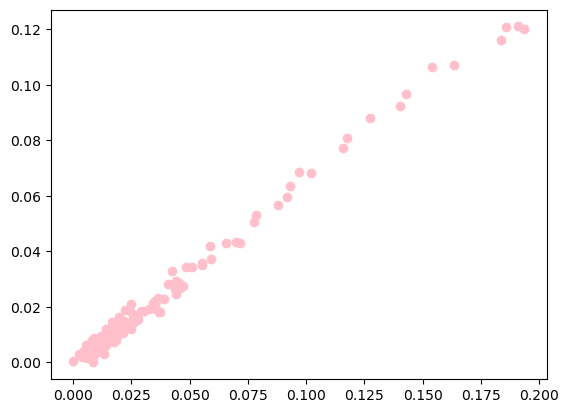

In [49]:
X = datasc[["Social support","Healthy life expectancy"]]
plt.scatter(X["Social support"],X["Healthy life expectancy"],c='pink')
plt.show()

/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[[0.01480566 0.00874981]
 [0.15591913 0.10245743]
 [0.06313701 0.04139996]]


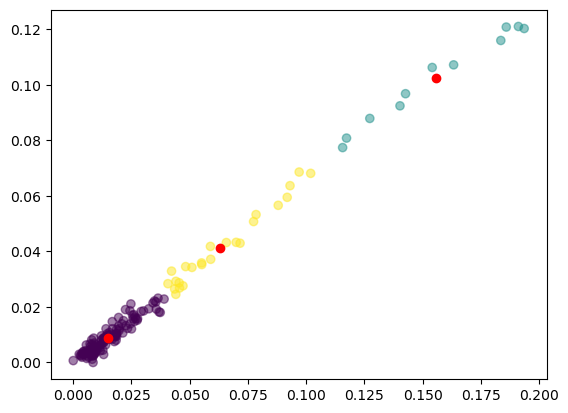

In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Social support'], X['Healthy life expectancy'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()